In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.utils import normalize

In [2]:
data=pd.read_excel('dataset/DATA.xlsx',date_parser=True)

In [3]:
data.head()

,Date,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
0,2018-01-01,1,0,1,1,1,1,1,1,1,0,0
1,2018-01-02,1,1,0,0,1,0,0,1,0,1,0
2,2018-01-03,0,1,0,1,0,1,1,0,0,1,0
3,2018-01-04,1,1,1,0,0,1,0,1,0,1,1
4,2018-01-05,0,0,1,1,1,1,0,1,1,0,1


In [8]:
data_training = data[data['Date']<'2018-02-15'].copy()
data_test = data[data['Date']>='2018-02-15'].copy()

In [9]:
data_training = data_training.drop(['Date'], axis = 1)
data_test = data_test.drop(['Date'], axis = 1)



In [10]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(data_training)
test_data = scaler.fit_transform(data_test)

/home/fahad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/fahad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
X_test = []
y_test = []

In [12]:
for i in range(3, test_data.shape[0]):
    X_test.append(test_data[i-3:i])
    y_test.append(test_data[i])

In [13]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [14]:
X_train = []
y_train = []

In [15]:
for i in range(3, training_data.shape[0]):
    X_train.append(training_data[i-3:i])
    y_train.append(training_data[i])

In [16]:

X_train=np.array(X_train)
y_train=np.array(y_train)

In [30]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (3, 11)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 11))
optimizer = optimizers.Adam(lr=1e-4)
regressior.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['MAE'])

In [31]:

history=regressior.fit(X_train, y_train, epochs=200, verbose=1,shuffle=False,validation_data=(X_test,y_test))

Train on 42 samples, validate on 12 samples
Epoch 1/200
42/42 [==============================] - 5s 117ms/sample - loss: 0.4888 - MAE: 0.4892 - val_loss: 0.4690 - val_MAE: 0.4697
Epoch 2/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.4883 - MAE: 0.4891 - val_loss: 0.4686 - val_MAE: 0.4697
Epoch 3/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.4878 - MAE: 0.4891 - val_loss: 0.4681 - val_MAE: 0.4697
Epoch 4/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.4873 - MAE: 0.4891 - val_loss: 0.4676 - val_MAE: 0.4697
Epoch 5/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.4868 - MAE: 0.4890 - val_loss: 0.4671 - val_MAE: 0.4697
Epoch 6/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.4863 - MAE: 0.4890 - val_loss: 0.4667 - val_MAE: 0.4697
Epoch 7/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.4858 - MAE: 0.4890 - val_loss: 0.4662 - val_MAE: 0.4697
Epoch 8/200
42/42 [====

Epoch 62/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.3951 - MAE: 0.4847 - val_loss: 0.3798 - val_MAE: 0.4715
Epoch 63/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.3907 - MAE: 0.4852 - val_loss: 0.3753 - val_MAE: 0.4716
Epoch 64/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.3866 - MAE: 0.4844 - val_loss: 0.3706 - val_MAE: 0.4716
Epoch 65/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.3767 - MAE: 0.4828 - val_loss: 0.3657 - val_MAE: 0.4717
Epoch 66/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.3714 - MAE: 0.4821 - val_loss: 0.3605 - val_MAE: 0.4718
Epoch 67/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.3677 - MAE: 0.4831 - val_loss: 0.3550 - val_MAE: 0.4718
Epoch 68/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.3600 - MAE: 0.4825 - val_loss: 0.3492 - val_MAE: 0.4719
Epoch 69/200
42/42 [==============================] - 0s 1ms/s

Epoch 123/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2367 - MAE: 0.4575 - val_loss: 0.2370 - val_MAE: 0.4625
Epoch 124/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2257 - MAE: 0.4455 - val_loss: 0.2370 - val_MAE: 0.4624
Epoch 125/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2301 - MAE: 0.4513 - val_loss: 0.2370 - val_MAE: 0.4624
Epoch 126/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2375 - MAE: 0.4572 - val_loss: 0.2371 - val_MAE: 0.4624
Epoch 127/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2370 - MAE: 0.4561 - val_loss: 0.2371 - val_MAE: 0.4624
Epoch 128/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2385 - MAE: 0.4592 - val_loss: 0.2372 - val_MAE: 0.4623
Epoch 129/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2339 - MAE: 0.4542 - val_loss: 0.2372 - val_MAE: 0.4623
Epoch 130/200
42/42 [==============================] - 

Epoch 184/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2283 - MAE: 0.4487 - val_loss: 0.2362 - val_MAE: 0.4605
Epoch 185/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2328 - MAE: 0.4523 - val_loss: 0.2362 - val_MAE: 0.4605
Epoch 186/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2330 - MAE: 0.4533 - val_loss: 0.2362 - val_MAE: 0.4604
Epoch 187/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2273 - MAE: 0.4468 - val_loss: 0.2362 - val_MAE: 0.4604
Epoch 188/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2345 - MAE: 0.4563 - val_loss: 0.2362 - val_MAE: 0.4603
Epoch 189/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2241 - MAE: 0.4450 - val_loss: 0.2361 - val_MAE: 0.4602
Epoch 190/200
42/42 [==============================] - 0s 1ms/sample - loss: 0.2347 - MAE: 0.4528 - val_loss: 0.2360 - val_MAE: 0.4600
Epoch 191/200
42/42 [==============================] - 

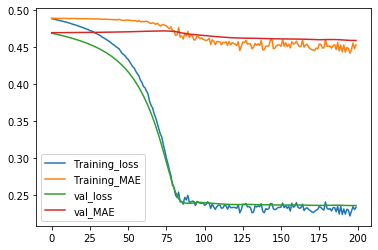

In [32]:
plt.figure()
plt.plot(history.history['loss'],label='Training_loss')
plt.plot(history.history['MAE'],label='Training_MAE')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_MAE'],label='val_MAE')
plt.legend()
plt.show()
